# Créditos

Este notebook é adaptado do original encontrado em https://www.kaggle.com/code/alekhyabotta/customer-segmentation

In [83]:
#importing the required libraries
import pandas as pd
import numpy as np

#viz Libraries
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")

#datetime
import datetime as dt

#file directoryy
import os

In [59]:
#reading the data
df = pd.read_csv('../datasets/sales_data_sample.csv', encoding = 'unicode_escape')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [61]:
df.shape #Dimensions of the data

(2823, 25)

In [62]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


We can sort the order lines.

In [85]:
df.sort_values(["ORDERNUMBER", "ORDERLINENUMBER"])

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR_MONTH
2024,10100,49,34.47,1,1689.03,2003-01-06,Shipped,1,1,2003,...,41,S24_3969,Online Diecast Creations Co.,Nashua,USA,NaN,Young,Valarie,Small,200301
680,10100,50,67.80,2,3390.00,2003-01-06,Shipped,1,1,2003,...,60,S18_2248,Online Diecast Creations Co.,Nashua,USA,NaN,Young,Valarie,Medium,200301
578,10100,30,100.00,3,5151.00,2003-01-06,Shipped,1,1,2003,...,170,S18_1749,Online Diecast Creations Co.,Nashua,USA,NaN,Young,Valarie,Medium,200301
1267,10100,22,86.51,4,1903.22,2003-01-06,Shipped,1,1,2003,...,92,S18_4409,Online Diecast Creations Co.,Nashua,USA,NaN,Young,Valarie,Small,200301
830,10101,26,100.00,1,3773.38,2003-01-09,Shipped,1,1,2003,...,168,S18_2795,"Blauer See Auto, Co.",Frankfurt,Germany,EMEA,Keitel,Roland,Medium,200301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,10425,49,100.00,9,5510.54,2005-05-31,In Process,2,5,2005,...,127,S24_2300,La Rochelle Gifts,Nantes,France,EMEA,Labrune,Janine,Medium,200505
780,10425,19,49.22,10,935.18,2005-05-31,In Process,2,5,2005,...,60,S18_2432,La Rochelle Gifts,Nantes,France,EMEA,Labrune,Janine,Small,200505
2172,10425,41,86.68,11,3553.88,2005-05-31,In Process,2,5,2005,...,96,S32_1268,La Rochelle Gifts,Nantes,France,EMEA,Labrune,Janine,Medium,200505
160,10425,38,100.00,12,5894.94,2005-05-31,In Process,2,5,2005,...,147,S10_4962,La Rochelle Gifts,Nantes,France,EMEA,Labrune,Janine,Medium,200505


In [63]:
#Removing the variables which don't add significant value for the analysis.
to_drop = ['PHONE','ADDRESSLINE1','ADDRESSLINE2','STATE','POSTALCODE']
df = df.drop(to_drop, axis=1)

Verifying variables with undefined values (i.e., missing values).

In [64]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
CITY                   0
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

Verifying types of variables.

In [65]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

Changing the data type of variable 'ORDERDATE' from object to datetime

In [66]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

### Summary stats of Quantitative variables

> Obs.: MSRP, meaning Manufacturer's Suggested Retail Price, is the price that a manufacturer recommends for stores to sell their product.

In [67]:
quant_vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
df[quant_vars].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


It is observed that there are no negative values for the quantitative variables, which is a good sign because we cannot have negative prices or quantities.

### Order Quantity Distribution

> A função `sns.distplot` é uma função do Seaborn, uma biblioteca de visualização de dados em Python construída sobre o Matplotlib. Essa função é usada para plotar a distribuição de um conjunto de dados contínuos, combinando um histograma com uma estimativa de densidade kernel (KDE, Kernel Density Estimate). Essa combinação permite visualizar tanto a frequência dos dados em diferentes intervalos quanto a suavização da distribuição para melhor percepção das tendências.

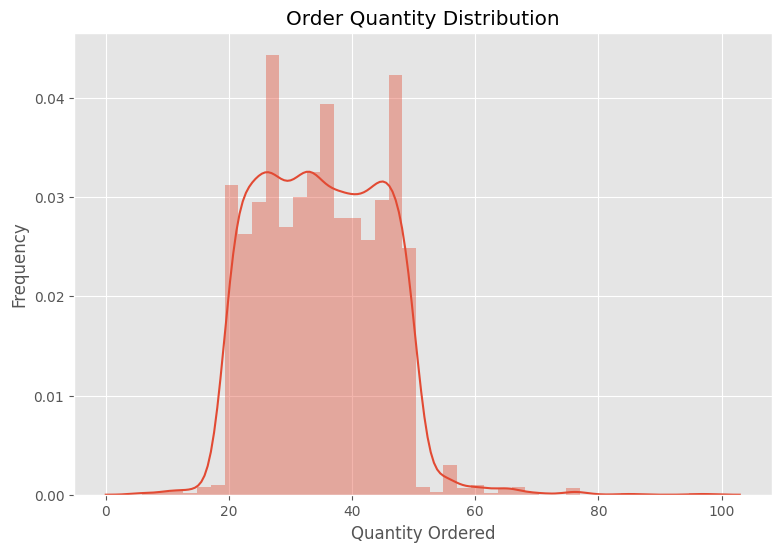

In [68]:
plt.figure(figsize=(9,6))
sns.distplot(df['QUANTITYORDERED'])
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

From the distribution plot of quantity, we can infer that the orders are bulk orders. Majority of the order's quantity are between 20 -40 units.

### Price Distribution

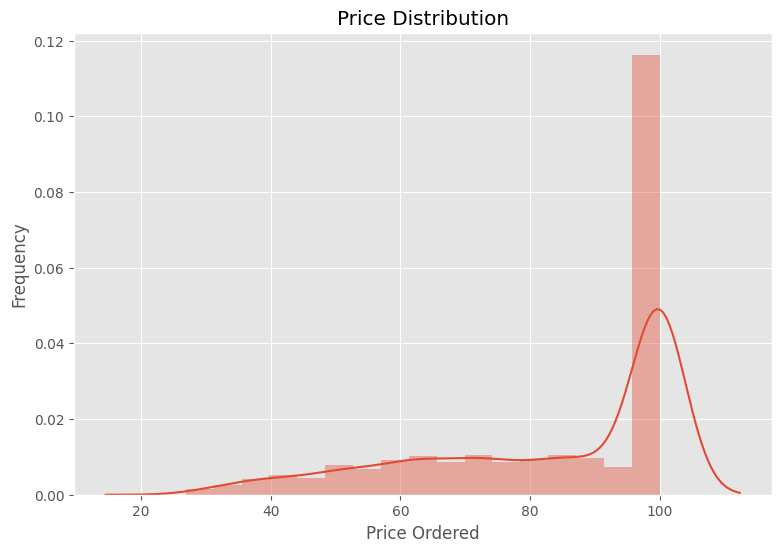

In [69]:
plt.figure(figsize=(9,6))
sns.distplot(df['PRICEEACH'])
plt.title('Price Distribution')
plt.xlabel('Price Ordered')
plt.ylabel('Frequency')
plt.show()

The distribution of Price is Left Skewed with max price of 100$. Interestingly, many of the orders received are of this price. It may be interesting to investigate further about this particular product line which has the highest price.

### Sales Distribution

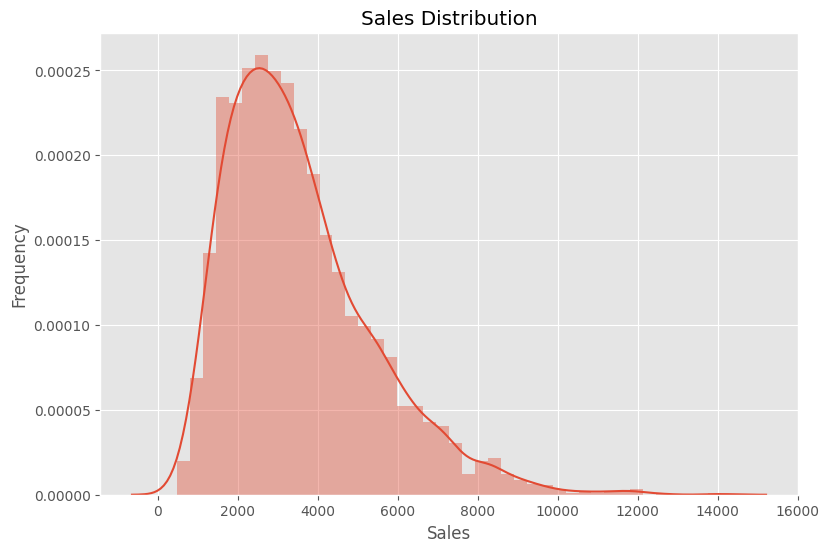

In [70]:
plt.figure(figsize=(9,6))
sns.distplot(df['SALES'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

### Analyzing the STATUS variable

> A função `pandas.value_counts` é usada para contar a frequência de valores únicos em uma série ou coluna de um DataFrame. É útil para resumir atributos categóricos.

In [71]:
df['STATUS'].value_counts(normalize = True)

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64

### Checking the time range of the data

> A função `pandas.groupby` é usada para realizar operações de agregação, transformação e filtragem em um conjunto de dados, agrupando-o com base em uma ou mais chaves (ou colunas). Esta função é importante para análise de dados, permitindo que dividir um DataFrame em subconjuntos menores de acordo com os valores de uma coluna ou combinações de colunas.

> A função `pandas.nunique` é usada para contar o número de valores distintos (ou únicos) ao longo de um eixo (colunas ou linhas) em um DataFrame ou em uma Série do pandas. Essa função é útil para entender a diversidade de valores em um conjunto de dados, identificar a cardinalidade de atributos categóricas e verificar a presença de duplicatas.

In [72]:
df.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

### Dealsize Distribution

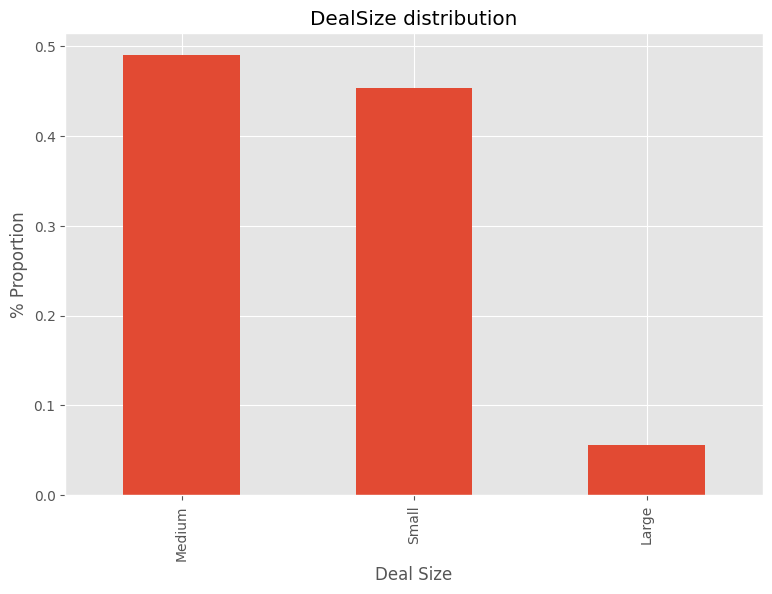

In [73]:
plt.figure(figsize=(9,6))
df['DEALSIZE'].value_counts(normalize = True).plot(kind = 'bar')
plt.title('DealSize distribution')
plt.xlabel('Deal Size')
plt.ylabel('% Proportion')
plt.show()

### Annual Revenue

> Annual revenue is the total income a company earns in a fiscal year.

No código a seguir, a instrução relevante é `df.groupby(['YEAR_ID'])['SALES'].sum().plot()`. Os componentes dessa instrução são descritos a abaixo.

1. `df.groupby(['YEAR_ID'])`: o método groupby() é usado para agrupar os dados em um DataFrame df com base nos valores de uma ou mais colunas. No caso, os dados são agrupados pela coluna 'YEAR_ID'. Isso cria um objeto GroupBy, que organiza os dados de acordo com as categorias presentes na coluna 'YEAR_ID'. Cada grupo representa um ano diferente.
2. `['SALES']`: Após o agrupamento, a coluna 'SALES' é selecionada para realizar operações adicionais. Isso significa que estamos interessados apenas na coluna 'SALES' dentro de cada grupo criado pelo groupby(). O resultado é uma série de GroupBy, onde cada grupo contém os valores da coluna 'SALES' para o ano correspondente.
3. `.sum()`: O método sum() é aplicado à série agrupada. Isso calcula a soma dos valores da coluna 'SALES' para cada grupo (ou seja, para cada ano). O resultado é uma série com o índice sendo os anos (valores únicos da coluna 'YEAR_ID') e os valores sendo a soma das vendas para cada ano.
4. `.plot()`: O método plot() é usado para criar um gráfico a partir da série resultante. Dependendo do ambiente em que você está executando o código (por exemplo, Jupyter Notebook), isso pode gerar automaticamente um gráfico de linha.

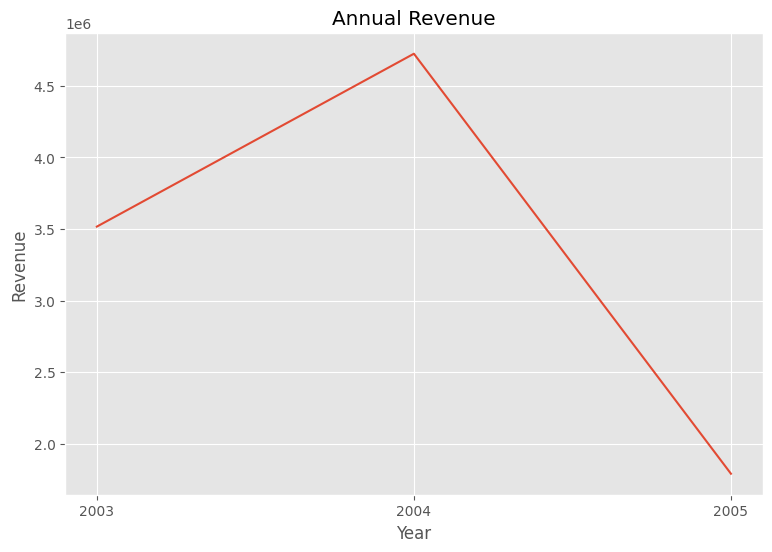

In [74]:
#Annual Revenue
plt.figure(figsize=(9,6))
df.groupby(['YEAR_ID'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Annual Revenue')
plt.xticks(np.arange(2003,2006,1))
plt.show()

As we dont have the complete data for 2005, analyzing the Annual Revenue can be misleading. Instead, we can analyze Monthy Revenue.

### Monthly Revenue

No código a seguir, a função sns.lineplot é usada. Um dos argumentos dessa função é `hue="YEAR_ID"`, que cria uma dimensão adicional ao gráfico com base na coluna YEAR_ID. O parâmetro `hue` cria uma linha separada para cada valor único na coluna YEAR_ID, e cada linha terá uma cor diferente. Isso é útil para comparar dados de diferentes anos ao longo dos meses.

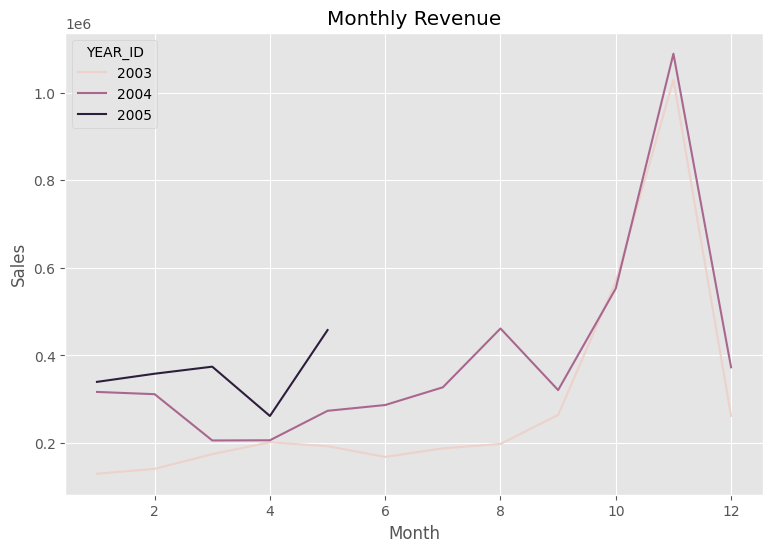

In [86]:
#Monthly Revenue
plt.figure(figsize=(9,6))

monthly_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.lineplot(x = "MONTH_ID", y = "SALES", hue = "YEAR_ID", data = monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

This clearly shows that the revenue is growing especially in October and November. It can be the result of the seasonality (Thanks Giving and other festivitues). We can also observe that 2005 is performing better than the other years in terms of revenue having the maximum sales in all the months(Jan - May). The reason behind this spike of sales in 2005 can be further investigated to maintain high sales in future.

>  Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year.

### Monthly Revenue Growth Rate

> The pct_change() method returns a DataFrame with the percentage difference between the values for each row and, by default, the previous row.

In [76]:
monthly_revenue['MONTHLY GROWTH'] = monthly_revenue['SALES'].pct_change()

In [77]:
monthly_revenue.head()

,YEAR_ID,MONTH_ID,SALES,MONTHLY GROWTH
0,2003,1,129753.60,NaN
1,2003,2,140836.19,0.085413
2,2003,3,174504.90,0.239063
3,2003,4,201609.55,0.155323
4,2003,5,192673.11,-0.044325


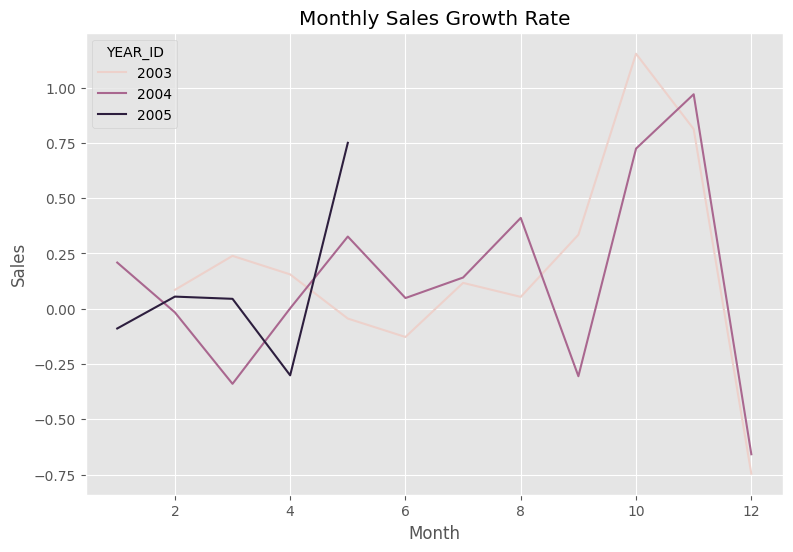

In [78]:
#Monthly Sales Growth Rate
plt.figure(figsize=(9,6))
sns.lineplot(x="MONTH_ID", y="MONTHLY GROWTH",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Growth Rate')
plt.show()

Apart from expected high/low growth rates during the seasonal months, there is big growth rate from Apr 2005 to May 2005.

### Top 10 countries by Sales

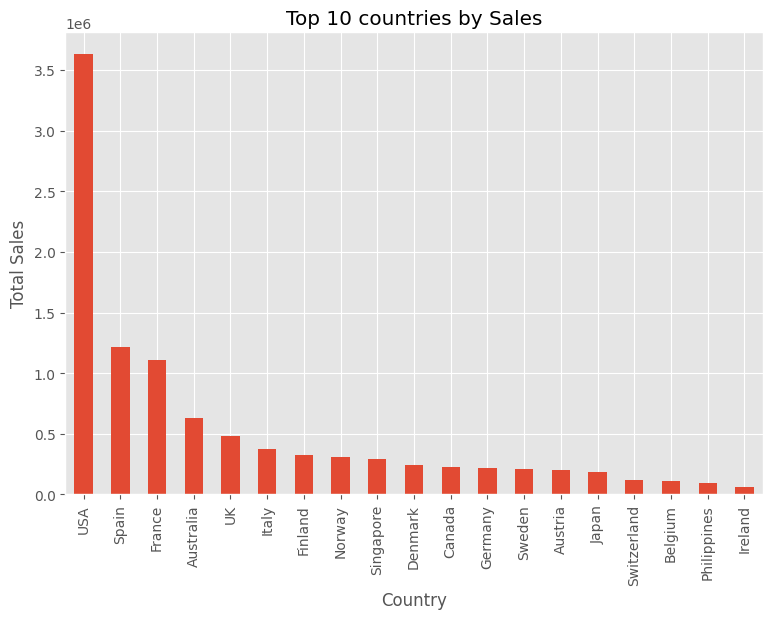

In [79]:
plt.figure(figsize=(9,6))
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

### Monthly Active Customers

A instrução `df['YEAR_ID'].map(str)` transforma os valores da coluna 'YEAR_ID' em strings.


A instrução `df['MONTH_ID'].map(str).map(lambda x: x.rjust(2, '0'))` tem vários componentes, que são descritos abaixo.

1. `df['MONTH_ID']`: Seleciona a coluna 'MONTH_ID' do DataFrame df. O resultado é uma Series contendo os valores dessa coluna.

2. `.map(str)`: A função map() aplica a função str a cada valor na Series. Isso converte todos os valores da coluna 'MONTH_ID' para o tipo de dados str (string). Como resultado, a coluna 'MONTH_ID', que inicialmente pode conter valores numéricos ou outros tipos, agora tem todos os seus valores representados como strings.

3. `.map(lambda x: x.rjust(2, '0'))`: A função map() é usada novamente, desta vez com uma função lambda. A função lambda `lambda x: x.rjust(2, '0')` é aplicada a cada string na Series. `x.rjust(2, '0')` é um método de string que alinha a string à direita, preenchendo com caracteres '0' até que a string tenha um comprimento total de 2 caracteres.

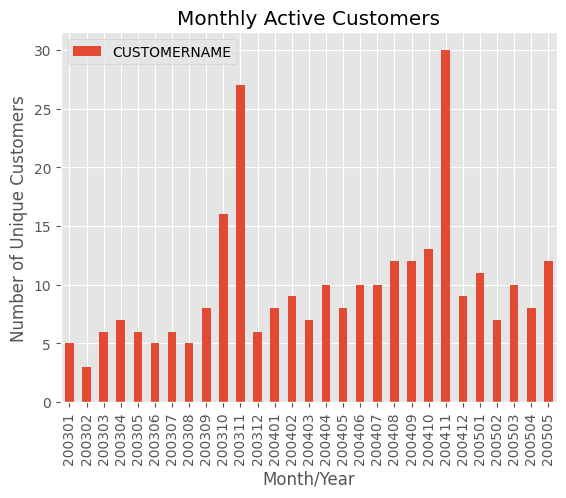

In [80]:
df['YEAR_MONTH'] = df['YEAR_ID'].map(str) + df['MONTH_ID'].map(str).map(lambda x: x.rjust(2,'0'))
monthly_active = df.groupby(['YEAR_MONTH'])['CUSTOMERNAME'].nunique().reset_index()
monthly_active.plot(kind='bar',x='YEAR_MONTH',y='CUSTOMERNAME')
plt.title('Monthly Active Customers')
plt.xlabel('Month/Year')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=90)
plt.show()

As expected, customers are highly active during the months of November and October. The number of active customers increased from 2003 to 2004 which indicates that the company is successful in retention/acquisition of old/new customers.

### Average Sales per Order

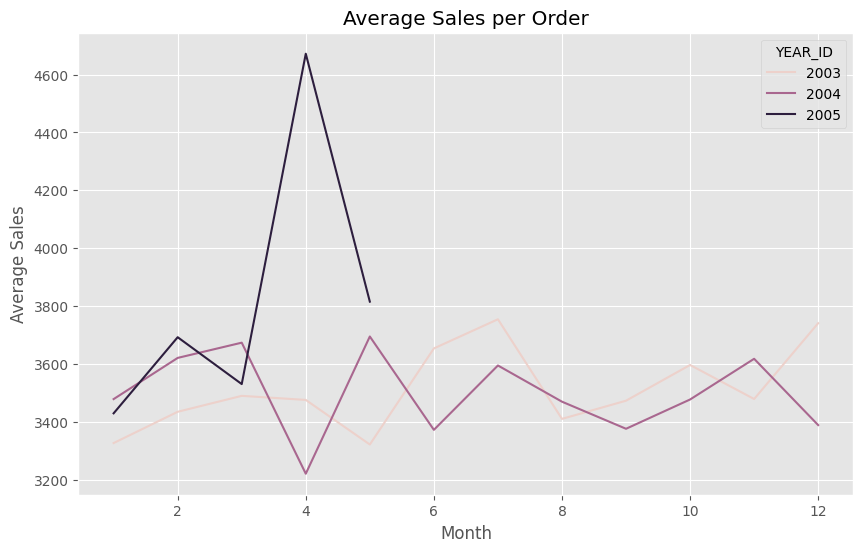

In [81]:
#Average Sales per Order
average_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=average_revenue)
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Average Sales per Order')
plt.show()

### New Customers Growth Rate

New customer is whoever did his/her first purchase in the time window we defined, i.e., Mothly in this analysis.


No código abaixo, a instrução `df_first_purchase = df.groupby('CUSTOMERNAME').YEAR_MONTH.min().reset_index()` é a principal.

1. `df.groupby('CUSTOMERNAME')`: O método groupby() agrupa as linhas do DataFrame df com base nos valores da coluna 'CUSTOMERNAME'.
O resultado é a criação de um objeto GroupBy, onde cada grupo corresponde a um cliente único identificado pelo valor na coluna 'CUSTOMERNAME'.

2. `.YEAR_MONTH.min()`: Após o agrupamento, a instrução acessa a coluna 'YEAR_MONTH' dentro de cada grupo e aplica o método min(), que calcula o valor mínimo dessa coluna para cada grupo.  Como resultado, retorna uma série com o índice sendo os nomes dos clientes ('CUSTOMERNAME') e os valores sendo o primeiro (mínimo) mês de compra ('YEAR_MONTH') de cada cliente. Isso representa o mês da primeira compra de cada cliente.

3. `.reset_index()`: O método reset_index() é usado para transformar o índice da série resultante em uma coluna do DataFrame, convertendo a série em um DataFrame normal novamente. Como resultado, cria um novo DataFrame onde o índice é redefinido para um padrão de inteiros, e a coluna 'CUSTOMERNAME' que era o índice na série se torna uma coluna regular. Agora, o DataFrame tem duas colunas: 'CUSTOMERNAME' e 'YEAR_MONTH'.

4. `df_first_purchase =`: Esta parte da instrução atribui o DataFrame resultante da operação acima a uma nova variável chamada df_first_purchase. Dessa forma, `df_first_purchase` é um DataFrame contendo o nome de cada cliente e o mês de sua primeira compra.

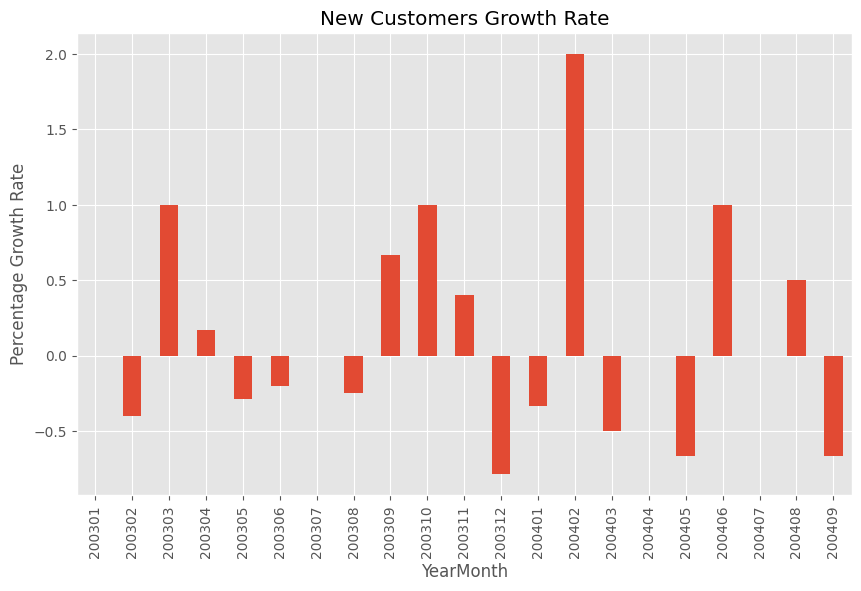

In [88]:
# New Customers Growth Rate
df_first_purchase = df.groupby('CUSTOMERNAME').YEAR_MONTH.min().reset_index()
df_first_purchase.columns = ['CUSTOMERNAME','FirstPurchaseDate']

plt.figure(figsize=(10,6))
df_first_purchase.groupby(['FirstPurchaseDate'])['CUSTOMERNAME'].nunique().pct_change().plot(kind='bar')
plt.title('New Customers Growth Rate')
plt.xlabel('YearMonth')
plt.ylabel('Percentage Growth Rate')
plt.show()

The highest growth rate is observed in February 2002. This can be investigated further to better understand what factors contributed the growth.